In [1]:
using Pkg

Pkg.activate("..")

using Distributions
using CairoMakie
using StatsBase
using Random
using SpecialFunctions

  Activating project at `~/Projects/MiNet`


In [29]:
λn,λp,r = 1.0,1.0,0.25
N = 10000

#inital sample
X = rand(Poisson(λn-r),N)
Y = rand(Poisson(λp-r),N)
R = rand(Poisson(r),N)

#sample consumer degree
Kci = X .+ R
Kco = Y .+ R

#get target degree sums
Sn = sum(Kci)
Sp = sum(Kco)

#get degree sum
nR = rand(Truncated(Poisson(N*r),0,min(Sn,Sp)))
nX = Sp - nR
nY = Sn - nR 

R_ = rand(Multinomial(nR, N))
X_ = rand(Multinomial(nX, N))
Y_ = rand(Multinomial(nY, N))

Kmi = X_ .+ R_
Kmo = Y_ .+ R_

sum.([Kci,Kco,Kmi,Kmo])

4-element Vector{Int64}:
 10013
 10053
 10053
 10013

In [17]:
cov(Kci,Kmi)

0.0029142314231423595

┌ Error: Error watching manifest
│   exception =
│    cannot set type for global OpenSSL_jll.best_wrapper. It already has a value or is already set to a different type.
│    Stacktrace:
│     [1] top-level scope
│       @ ~/.julia/packages/JLLWrappers/pG9bm/src/toplevel_generators.jl:119
│    Revise evaluation error at /home/tom/.julia/packages/JLLWrappers/pG9bm/src/toplevel_generators.jl:119
│    
│    Stacktrace:
│     [1] methods_by_execution!(recurse::Any, methodinfo::Revise.CodeTrackingMethodInfo, docexprs::Dict{Module, Vector{Expr}}, mod::Module, ex::Expr; mode::Symbol, disablebp::Bool, always_rethrow::Bool, kwargs::@Kwargs{})
│       @ Revise ~/.julia/packages/Revise/bAgL0/src/lowered.jl:258
└ @ Revise ~/.julia/packages/Revise/bAgL0/src/pkgs.jl:493
┌ Error: Error watching manifest
│   exception =
│    cannot set type for global OpenSSL_jll.best_wrapper. It already has a value or is already set to a different type.
│    Stacktrace:
│     [1] top-level scope
│       @ ~/.julia/pac

In [16]:
cov(Kmi,Kmo)

0.24443838383838348

In [186]:
Sx = 10000
Sy = 10000
N = 10000

λn,λp,r = 1.0,1.0,0.25

nR = rand(Poisson(N*r))
nX = Sx - nR
nY = Sy - nR 

R_ = rand(Multinomial(nR, N))
X_ = rand(Multinomial(nX, N))
Y_ = rand(Multinomial(nY, N))

X = X_ .+ R_
Y = Y_ .+ R_

cov(X,Y)

0.24222422242224223

In [69]:
function pdf_BP(x,y,lX,lY,r)
   q = 0
    for k = 0:min(x,y)
       q += exp(-r-lX-lY) * (r^k * lX^(x-k) * lY^(y-k)) / (gamma(k+1) * gamma(x-k+1) * gamma(y-k+1))
    end
    return(q)
end

pdf_BP (generic function with 1 method)

In [88]:
#inital sample
λn,λp,r = 1.0,1.0,0.25
N = 100
K = 1000
#sample first
X = rand(Poisson(λn- r),N)
Y = rand(Poisson(λp - r),N)
R  = rand(Poisson(r),N)

Ki = X .+ R
Ko = Y .+ R

#generate random sample of feasible matching distributions
Sn = sum(Ki)
Sp = sum(Ko)

#generate samples of size N-1
X = rand(Poisson(λn - r),N -1, K)
Y = rand(Poisson(λp - r), N-1, K)
R  = rand(Poisson(r),N - 1, K)

#calculate nth element
X2 = X .+ R
Y2 = Y .+ R

Xn = Sn .- sum(X2, dims = 1)[:]
Yn = Sp .- sum(Y2, dims = 1)[:]

#get probabilties
x = hcat(X2')
y = hcat(Y2')

p_mat = pdf_BP.(x,y,λp,λn,r)

prod(p_mat, dims = 2)

1000×1 Matrix{Float64}:
 1.0769421441889823e-109
 3.249276452256812e-115
 8.463553098029005e-116
 1.343455427607078e-116
 7.861936440465579e-112
 2.3526127623021423e-112
 2.1957590931617955e-118
 3.268330945630177e-114
 8.635914624067386e-117
 3.578521706177254e-111
 2.55142118389709e-115
 8.5540529721588e-112
 6.975743301667931e-112
 ⋮
 1.7592111982818755e-115
 1.6576694015942982e-115
 7.006395207584709e-111
 1.3484526673294048e-120
 4.710151938850014e-110
 2.0912879502441293e-111
 1.180854397356621e-112
 1.7692988537266517e-112
 1.6744788243308502e-113
 2.0993456378079076e-118
 1.6419516856218604e-109
 5.666276444430808e-114

In [64]:
K = 10000
N = 1000
dP = Poisson()

init = rand(dP, N)
S = sum(i)

samples = zeros(K,N)
samples[1,:] .= init

for i = 2:K
    ind = sample(1:N, 2)
    #free value
    free = sum(samples[i-1, ind]) |> Int
    #sample 
    samples[i, :] .= samples[i-1, :]
    samples[i, ind] = rand(Multinomial(free,2))
    # samples[i, ind[2]] = free - samples[i, ind[1]]
end

In [89]:
function sample_BP(λX,λY,r)
    X = rand(Poisson(λX - r))
    Y = rand(Poisson(λY - r))
    R = rand(Poisson(r))

    return([X+R,Y+R])
end

function pdf_BP(x,y,lX,lY,r)
   q = 0
    for k = 0:min(x,y)
       q += exp(-r-lX-lY) * (r^k * lX^(x-k) * lY^(y-k)) / (gamma(k+1) * gamma(x-k+1) * gamma(y-k+1))
    end
    return(q)
end

pdf_BP (generic function with 1 method)

In [121]:
T=Int(1e3) #Gibbs steps
N=10 #n-1

x = zeros(Int,T,N,2)
[x[1,n,:] .= sample_BP(1.0,1.0,0.1) for n = 1:N]

S = [N+5,N+10]

lx = 5.0
ly = 5.0
ρ = 0.5
r = ρ*sqrt(lx*ly)

g(x,y) = pdf_BP(x,y,lx,ly,r)

for t = 2:T
    #copy and shuffle samples
    x[t,:,:] .= x[t-1,:,:]
    
    #loop over n samples
    for i = 1:N            
        #find remaining scope
        scope = S .- sum(x[t,:,:],dims = 1)[:] .+ x[t,i,:]    
        
        #proposed update
        prop = x[t,i,:] .+ rand(-1:1, 2)
        prop .= max.(prop,0)
        prop .= min(prop,scope)

#     #calculate acceptance prob
        a = Int(S[1] - sum(x[t,1:(i-1),1]) - sum(x[t,(i+1):end,1]) - prop[1])
        b = Int(S[2] - sum(x[t,1:(i-1),2]) - sum(x[t,(i+1):end,2])- prop[2])
        
        v = g(prop[1],prop[2]) * g(a,b) /
            ( g(Int.(x[t-1,i,:])...) * g(Int.(S .- sum(x[t,:,:],dims = 1)[:])...) )

        println(v)
#     v = pdf(dP, prop) * pdf(dP, s - sum(x[t,ind]) - prop) / (pdf(dP,x[t-1, i]) * pdf(dP, s - sum(x[t,])))
    if rand() < v
        x[t,i,:] .= prop
    end
    end
end


3.305198542106273
0.22661320107634678
1.0766105629715614
0.46442048517520207
0.10300600048924853
3.014382418844012
1.0
0.4414833438089252
4.326695617393292
0.23112326089683907
0.9817724701445633
1.1875
16.465263157894736
1.0
2.777905638665133
2.040268456375839
1.875
4.8
1.3476134585289512
0.38079591091639287
0.4887154250806041
0.4078282828282829
0.23219814241486067
8.479876160990711
1.0
0.4216867469879518
0.9277108433734941
0.14285714285714285
1.0740103270223753
0.08741258741258741
0.053418803418803416
0.846153846153846
0.31818181818181823
0.31818181818181823
1.0
1.0
1.0
1.0
1.0
0.9090909090909093
1.0
0.45454545454545453
0.39393939393939403
0.7142857142857142
0.3896713615023474
8.479876160990711
0.49586776859504134
1.0
0.09974747474747475
0.45454545454545453
0.0
0.33333333333333337
0.0
0.0
0.0
0.5220883534136547
3.2999999999999994
0.6111111111111112
3.1869444444444444
1.0
1.0
1.0
0.0
0.0
1.0
0.6384615384615384
1.0
0.4545454545454546
0.2580696708213487
1.0
0.6620370370370371
0.591666666

1000×2 Matrix{Int64}:
 15  12
 15  14
 12  20
 14  20
 14  20
 15  19
 13  20
 14  19
 15  19
 14  17
 14  19
 15  20
 15  18
  ⋮  
 14  18
 15  18
 14  17
 13  17
 12  18
 13  19
 14  19
 14  19
 13  17
 15  20
 14  18
 14  18

In [113]:
S .- 6

2-element Vector{Int64}:
  9
 14

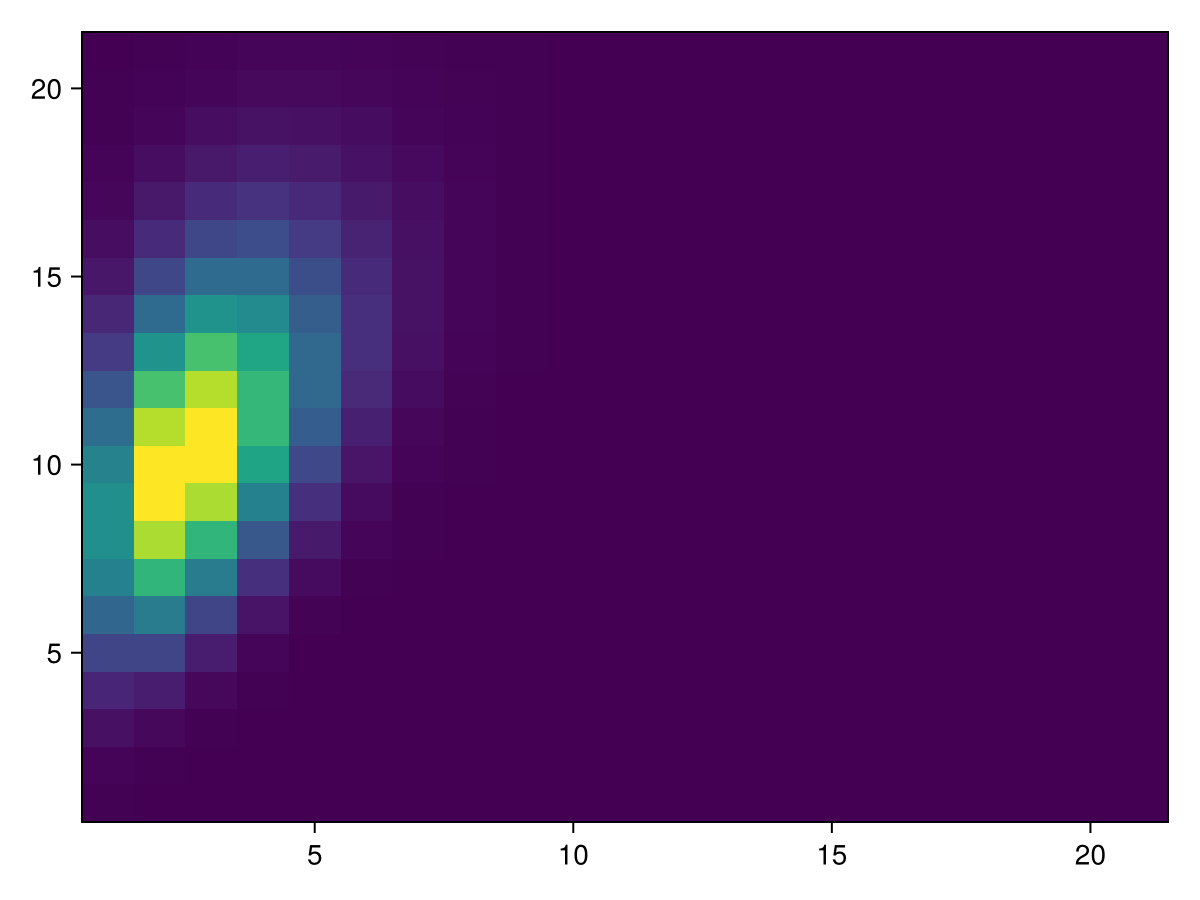

In [540]:
lx = 2.0
ly = 10.0

r = 1.0 * min(lx,ly)

# r = ρ*sqrt(lx*ly)

g(x,y) = pdf_BP(x,y,lx - r,ly - r,r)

[g(x,y) for x = 0:20, y = 0:20] |> heatmap

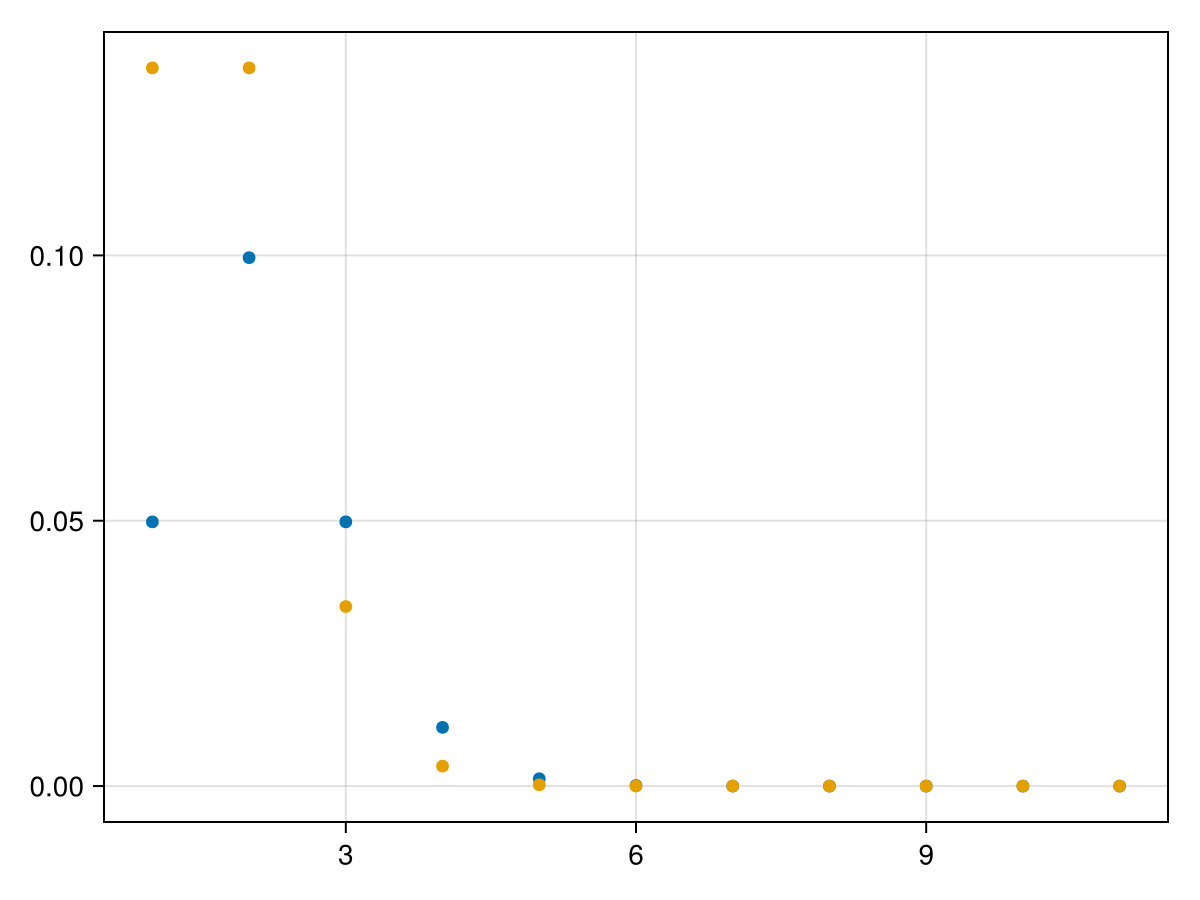

In [329]:
pdf_pois(x,y,l,m) = (l^x * exp(-l) / factorial(x))*(m^y * exp(-m) / factorial(y))

f,ax = plot(pdf_pois.(0:10,0:10,2.0,1.0)) 
plot!(ax, pdf.(Poisson(1.0), 0:10) .* pdf.(Poisson(), 0:10))
f